<h1 style="color:turquoise;">Linear Regression Using Sklearn</h1>

 ### Importing the libraries

Since this model is built from scratch, without using any framework, so will only be using the basic libraries such as numpy for array manipulation and pandas for loading the dataset. Also, we will be using sklearn for preprocessing the data.

In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
from sklearn.linear_model import LinearRegression

### Importing the dataset

In [76]:
dataset = pd.read_csv('50_Startups.csv')

In [66]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Visualizing the dataset

First we will try to find some insights from the dependent variable, "Profit"

In [6]:
import seaborn as sns
sns.pairplot(dataset)

C:\Users\Nuages\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\Nuages\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [7]:
dataset['Profit'].describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: Profit, dtype: float64

From the above pairplot we can clearly see that profit has a linear relationship with R&D Spend and also a rough linear relationship with marketing spend. Also, we can infer that Profit has very less correlation with Administration.

#### To make the inferences more clear we can use the correlation matrix

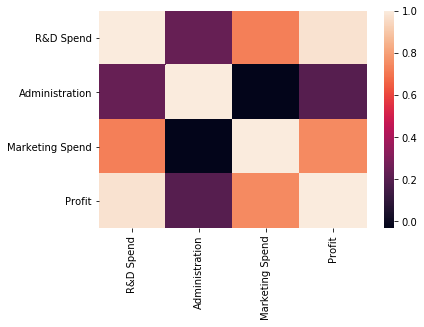

In [8]:
corr = dataset.corr()
sns.heatmap(corr)

One more thing to notice here is the correlation between R&D Spend and Marketing Spend

### Now, we would like to have some insights on the relation between State and Profit

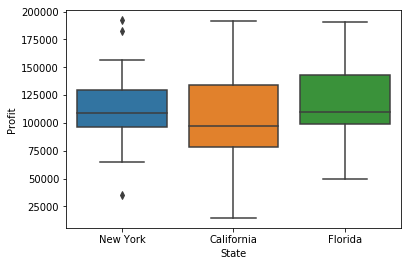

In [9]:
sns.boxplot(x=dataset['State'], y=dataset['Profit'])

From here we can see that California has a very high profit range compared to the other states. But, the median of all the states are almost same.

## Pre-processing the dataset

First we will convert the state feature into labels using the label encoder.

In [10]:
encoder = LabelEncoder()
states = encoder.fit_transform(dataset['State'])
dataset['State'] = states
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


Since, administration is not very much correlated to the Profit, we may also remove it from the dataset for better accuracy.

In [109]:
dataset = dataset.drop(['Administration', 'State'], axis=1)
dataset.head()

,R&D Spend,Marketing Spend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94


## Splitting the dataset into train and test

In [11]:
train_set = dataset[0:40]
test_set = dataset[40:]

In [12]:
train_set.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


    Defining the LinearRegressionModel :

In [13]:
model = LinearRegression()

Fitting the model

In [14]:
y_train = train_set['Profit']
x_train = train_set.drop(['Profit'], axis=1)
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Predictions

Predicting results on the test set

In [17]:
results = model.predict(test_set.drop('Profit', axis=1))

In [18]:
results

array([79678.93180023, 78661.5888013 , 76087.18460316, 61822.00648807,
       68799.1755499 , 49922.16434848, 60782.42790067, 51940.1630599 ,
       52855.39107555, 54099.80867224])

    Checking the accuracy of training model

### Results

In [26]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(results, test_set['Profit']))

11070.27106264167


In [27]:
from sklearn.metrics import r2_score
print(r2_score(results,test_set['Profit']))

-0.9780356978235967


In [29]:
for i,j in zip(results, test_set['Profit']):
    print(round(i,3),j)

79678.932 78239.91
78661.589 77798.83
76087.185 71498.49
61822.006 69758.98
68799.176 65200.33
49922.164 64926.08
60782.428 49490.75
51940.163 42559.73
52855.391 35673.41
54099.809 14681.4


As we can see, the results are quite accurate, but not for the outliers. So, we may need to generalize our model. We may do so by removing the administration feature.

In [77]:
dataset = dataset.drop(['Administration', 'State'], axis=1)
dataset.head()

,R&D Spend,Marketing Spend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94


In [78]:
train = dataset[0:40]
test = dataset[40:]

In [79]:
model_1 = LinearRegression()

In [80]:
y_train = train['Profit']
x_train = train.drop(['Profit'], axis=1)


In [81]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(test.drop(['Profit'], axis=1))

In [82]:
model_1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [84]:
results = model_1.predict(x_test)

In [85]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(results, test_set['Profit']))

10034.783494617299


In [86]:
from sklearn.metrics import r2_score
print(r2_score(results,test_set['Profit']))

-0.9692838359336517


In [87]:
for i,j in zip(results, test_set['Profit']):
    print(round(i,3),j)

78460.708 78239.91
77538.632 77798.83
73815.515 71498.49
63968.804 69758.98
68699.368 65200.33
52026.295 64926.08
62192.197 49490.75
51216.759 42559.73
51620.757 35673.41
52736.392 14681.4


So, that's the best result we can get considering the small size of dataset.